# L01: Energy Data Analysis: Correlations

## Pre lab

Write a Python script that reads the income tier column of the customers.csv file and counts the number of high-income, mid-range, low-mid customers (there are 8000 customers – please don’t manually count this!) (see the appendix for an example code. Note that there are tons of pieces in the code that you do not need)

Modify the code to also read the battery capacity and calculate the average of car battery capacity for the high-income customers, mid-range income customers, and low-mid range customers. Create a bar graph representing this information.

In [14]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

In [2]:
filename = "./warsaw/customers.csv"
high_ct, mid_ct, lowmid_ct = (0, 0, 0)
high_bc_sum, mid_bc_sum, lowmid_bc_sum = (0, 0, 0)

with open(filename, mode="r", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header
    for row in reader:
        tier = row[1].strip()
        bat_cap = float(row[3].strip())
        if tier == "High":
            high_ct += 1
            high_bc_sum += bat_cap
        elif tier == "Mid-Range":
            mid_ct += 1
            mid_bc_sum += bat_cap
        elif tier == "Low-Mid":
            lowmid_ct += 1
            lowmid_bc_sum += bat_cap
        else:
            print(tier)  # anything i haven't accounted for?

print("customers")
print("high income customers: ", high_ct)
print("high battery capacity avg (kwh): ", high_bc_sum/high_ct)
print("low-mid income: ", lowmid_ct)
print("low-mid battery capacity avg (kwh): ", lowmid_bc_sum/lowmid_ct)
print("mid income: ", mid_ct)
print("mid battery capacity avg (kwh): ", mid_bc_sum/mid_ct)

customers
high income customers:  1190
high battery capacity avg (kwh):  85.65613445378101
low-mid income:  3990
low-mid battery capacity avg (kwh):  45.143558897242826
mid income:  2820
mid battery capacity avg (kwh):  70.76134751772918


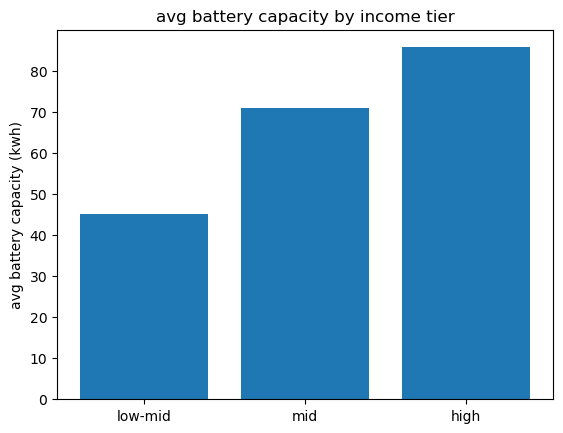

In [3]:
# graph
cats = ["low-mid", "mid", "high"]
avgs = [lowmid_bc_sum/lowmid_ct, mid_bc_sum/mid_ct, high_bc_sum/high_ct]

# plot
fig, ax = plt.subplots()

ax.bar(cats, avgs)

ax.set_ylabel('avg battery capacity (kwh)')
ax.set_title('avg battery capacity by income tier')

plt.show()

## lab

Write a function that calculates the correlation coefficient (r, see eq. 1) between two quantitative variables [lists]. Equation 1 uses n for the total number of samples of variable pairs, xn and yn represent individual data points from the n-th pair, x ̅ and y ̅ are the averages of each quantitative variable, and sx and sy represent the standard deviation of each set. Use the data from table 1 to test your function. The expected value of r for this dataset is 0.99, indicating very strong correlation.

In [13]:
x_ = [54.5,59.5,63.5,67.5,72.0,78.5,83.0]
y_ = [81,97,103,123,150,182,195]

def compute_r(x, y):
    n = len(x)
    sum = 0
    for i in range(n):
        sum += (x[i] - np.mean(x)) / np.std(x) * ((y[i] - np.mean(y)) / np.std(y))
    return 1 / (n) * sum # 1/n instead of 1/(n-1) for some reason

print(compute_r(x_,y_))

0.9906248824255884


## part 2
- [ ] Reads the Average Temp, Distance to Solar Noon, Relative Humidity, and Power Generated column of the Power generation.csv you downloaded during step 6 of the Pre-Lab Activities
- [ ] Calculates the correlation coefficient between Distance to Solar Noon and Power Generation as well as Relative Humidity and Power Generation
- [ ] Graphs a figure containing two scatter plots: one of Power Generation vs Distance to Solar Noon and one of Power Generation vs Relative Humidity

In [50]:
with open("./forecast/generation.csv", 'r') as f:
    data = list(csv.reader(f, delimiter=","))

import numpy as np
data = np.array(data)

['245' '2008' '9' '1' '4' 'FALSE' '0.628534704' '69' '28' '7.5' '0' '10.0'
 '77' '5' '29.85' '0']


In [53]:
# Calculates the correlation coefficient between Distance to Solar Noon (col 6) and 
# Power Generation as well as Relative Humidity and Power Generation 

dtsn = []
pg = []
rh = []
data = data[1:] # delete header
for i in range(len(data)):
    dtsn.append(float(data[i][6]))
    pg.append(float(data[i][15]))
    rh.append(float(data[i][12]))
                
print(compute_r(dtsn, pg))
print(compute_r(rh, pg))


-0.7466292978003867
-0.5225562939118084


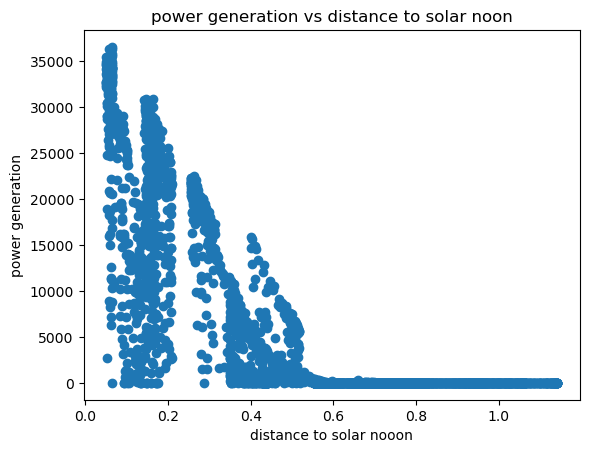

r =  -0.7466292978003867


In [62]:
# scatter plot of pg vs dtsn
fig, ax = plt.subplots()
ax.scatter(dtsn, pg)

ax.set_xlabel('distance to solar nooon')
ax.set_ylabel('power generation')
ax.set_title('power generation vs distance to solar noon')

plt.show()
print("r = ", compute_r(dtsn, pg))

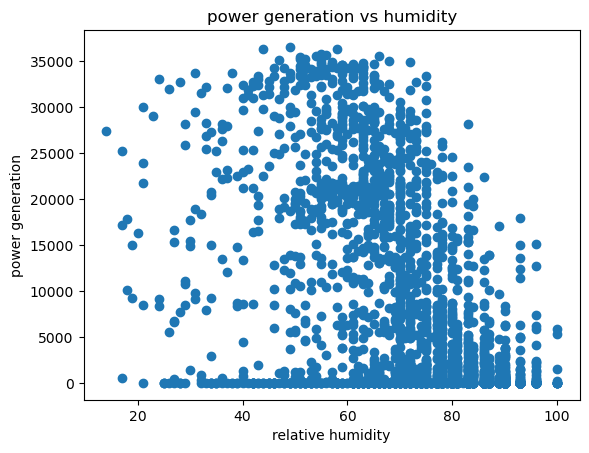

r =  -0.5225562939118084


In [64]:
# scatter plot of pg vs rh
fig, ax = plt.subplots()

ax.scatter(rh, pg)

ax.set_xlabel('relative humidity')
ax.set_ylabel('power generation')
ax.set_title('power generation vs humidity')

plt.show()
print("r = ", compute_r(rh, pg))


_Discuss with your partner how the graphs and the r coefficients relate to each other, if the correlation results where what you expected/or not, why that might be._

In the distance to solar noon plot, r value is closer to -.7, and we see evidence of a moderate linear relationship. In the relative humidity plot, there r-value is -.5, and there is no linear relationship as one would expect. This shows that there is some relationship between power generation and distance to solar noon. The data shows that relative humidity does not affect power generation.